
# 🌼 기계학습 및 데이터 전처리 - 2차시(24.11.01)

---


## 1. 이상치 처리
### 1-1. 이상치를 포함한 데이터프레임

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
data = {
    '고객ID' : [101, 102, 103, 104, 105, 106],
    '이름' : ['유진', '가을', '레이', '원영', '리즈', '이서'],
    '구매금액' : [25000, 30000, 15000, 50000, 10000, 500000]
}
df_outliers = pd.DataFrame(data)
df_outliers.head(3)

,고객ID,이름,구매금액
0,101,유진,25000
1,102,가을,30000
2,103,레이,15000


In [5]:
df_outliers

,고객ID,이름,구매금액
0,101,유진,25000
1,102,가을,30000
2,103,레이,15000
3,104,원영,50000
4,105,리즈,10000
5,106,이서,500000


### 2-2. 이상치 탐색
- 박스플롯 찍어보기
- 시각적으로 이상치 탐색
- 박스플롯상에서 점으로 나타나는 값이 이상치일 가능성 多

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

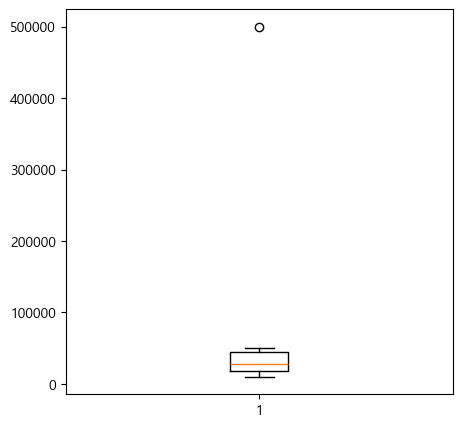

In [7]:
plt.figure(figsize = (5, 5))
plt.boxplot(df_outliers['구매금액'])
plt.show()

### 2-3. 이상치 처리
- 특정 조건에 따라 이상치 제거

In [9]:
df_outliers[df_outliers['구매금액'] < 100000]

,고객ID,이름,구매금액
0,101,유진,25000
1,102,가을,30000
2,103,레이,15000
3,104,원영,50000
4,105,리즈,10000


In [10]:
df_no_outliers = df_outliers[df_outliers['구매금액'] < 100000]
df_no_outliers

,고객ID,이름,구매금액
0,101,유진,25000
1,102,가을,30000
2,103,레이,15000
3,104,원영,50000
4,105,리즈,10000


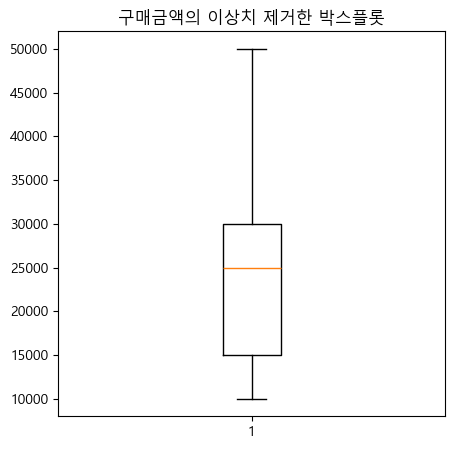

In [11]:
plt.figure(figsize = (5, 5))
plt.boxplot(df_no_outliers['구매금액'])
plt.title('구매금액의 이상치 제거한 박스플롯')
plt.show()

### boxplot
- 박스플롯은 데이터의 분포와 이상치를 시각적으로 보여주는 그래프
### 구성 요소 : 
 1. `박스(Box)`:  
 데이터의 1사분위수(Q1)와 3사분위수(Q3) 사이의 범위  
 박스의 상단은 Q3, 하단은 Q1을 나타내며, 이 범위는 데이터의 중간 50%를 포함

 2. `중앙선(Median Line)`:  
 박스 안의 굵은 선은 중앙값(Median).  
 -> 데이터의 중간에 해당하는 값  

 3. `수염(Whiskers)`:  
 박스 상단과 하단에서 각각 최솟값과 최댓값을 나타냄
 하지만, 수염은 극단적인 값(이상치)을 제외한 값들로 제한됨

 4. `이상치(Outliers)`:  
 수염 밖에 있는 점으로 표시된 값들
 이 값들은 일반적인 데이터 범위를 벗어난 값들로, 이상치라고 함

In [12]:
Q1 = df_outliers['구매금액'].quantile(0.25)
Q3 = df_outliers['구매금액'].quantile(0.75)
median = df_outliers['구매금액'].median()
IQR = Q3 -Q1

In [13]:
print(f'1사분위수 (Q1) : {Q1}')
print(f'3사분위수 (Q3) : {Q3}')
print(f'중앙값 : {median}')
print(f'사분위 범위(IQR) : {IQR}')

1사분위수 (Q1) : 17500.0
3사분위수 (Q3) : 45000.0
중앙값 : 27500.0
사분위 범위(IQR) : 27500.0


In [14]:
lower_bound = Q1 - (1.5 * IQR)
# IQR방법 : 이상치 범위를 계산하는 공식
# (1.5 * IQR) 밖의 값은 이상치로 간주
upper_bound = Q3 + (1.5 * IQR)

In [15]:
print(f'이상치 탐색 범위 {lower_bound}~{upper_bound}')

이상치 탐색 범위 -23750.0~86250.0


In [18]:
outliers = df_outliers[(df_outliers['구매금액'] < lower_bound) | (df_outliers['구매금액'] > upper_bound)]
outliers

,고객ID,이름,구매금액
5,106,이서,500000


In [21]:
normal_data = df_outliers.iloc[:-1, : ]
normal_data

,고객ID,이름,구매금액
0,101,유진,25000
1,102,가을,30000
2,103,레이,15000
3,104,원영,50000
4,105,리즈,10000


In [22]:
df_outliers.iloc[5]

고객ID       106
이름          이서
구매금액    500000
Name: 5, dtype: object

In [23]:
# 이상치였던 이서 데이터만 따로 한 줄 저장
outliers_data = df_outliers.iloc[5]

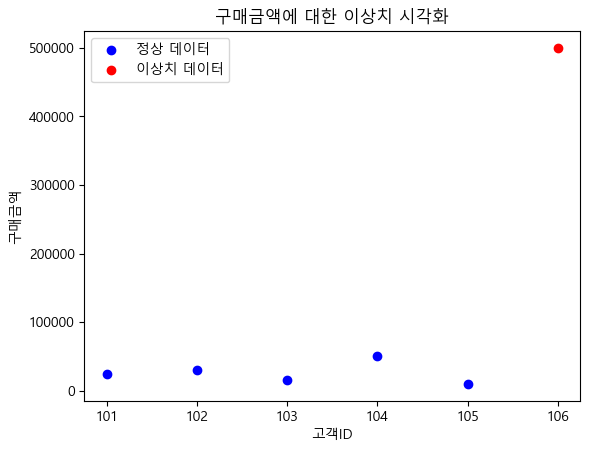

In [25]:
plt.scatter(normal_data['고객ID'], normal_data['구매금액'], color='blue', label='정상 데이터')
plt.scatter(outliers_data['고객ID'], outliers_data['구매금액'], color='red', label='이상치 데이터')

plt.title('구매금액에 대한 이상치 시각화')
plt.xlabel('고객ID')
plt.ylabel('구매금액')
plt.legend()
plt.show()

## 3. 정규화 (Normalization)
### 3-1. Min-Max Scaling
- 데이터를 0과 1사이의 값으로 정규화하여 특정 값의 크기를 조정하는 방법
- 연속형 변수에 사용할 수 있음
- MinMaxScaler는 모든 값을 최대값을 1, 최솟값을 0으로 변환
- 데이터의 범위를 좁혀서 머신러닝 모델이 데이터를 학습하기 쉽게 만듦

In [28]:
# pip install pydataset

In [29]:
from pydataset import data
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001



|열 이름|설명|
|---|---|
|Ozone	|오존 수준 (ppb 단위, 결측치 존재)|
|Solar.R|	태양 복사량 (lang 단위)|
|Wind|	바람의 속도 (mph 단위)|
|Temp|	온도 (화씨)|
|Month	|측정 월 (5 = 5월, 6 = 6월, ...)|
|Day|	측정 일 (1~31일)|

In [30]:
df = data('airquality')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5


In [32]:
df = df.rename(columns={
    'Ozone' : '오존농도',
    'Solar.R' : '태양복사량',
    'Wind' : '풍속',
    'Temp' : '온도',
    'Month' : '월',
    'Day' : '일'
})
df.head()

,오존농도,태양복사량,풍속,온도,월,일
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5


In [34]:
# 첫번째 할일 : 결측치 확인하기
df.isnull().sum()

오존농도     37
태양복사량     7
풍속        0
온도        0
월         0
일         0
dtype: int64

In [35]:
df.mean()

오존농도      42.129310
태양복사량    185.931507
풍속         9.957516
온도        77.882353
월          6.993464
일         15.803922
dtype: float64

In [36]:
df.fillna(df.mean(), inplace=True)

In [37]:
df.head()

,오존농도,태양복사량,풍속,온도,월,일
1,41.00000,190.000000,7.4,67,5,1
2,36.00000,118.000000,8.0,72,5,2
3,12.00000,149.000000,12.6,74,5,3
4,18.00000,313.000000,11.5,62,5,4
5,42.12931,185.931507,14.3,56,5,5


In [ ]:
# 연속형 변수 : 숫자로 표현할 수 있고, 소수점으로 표현할 수 있는 변수
# 예 : 키, 몸무게, 온도, 거리
# 범주형 변수 : 서로 구분은 되는 범주, 그룹 (수치적인 의미가 없는 변수)
# 예 : 성별, 척도(매우좋음, 좋음, 보통), 혈액형

In [38]:
features = ['오존농도', '태양복사량', '풍속', '온도']

In [45]:
list_ =  [ 'a', 'b', 'c']
for i,j in enumerate(list_):
    print(i, j, sep=',')

0,a
1,b
2,c


In [47]:
for i, feature in enumerate(features):
    print(i, feature,sep='/')

0/오존농도
1/태양복사량
2/풍속
3/온도


In [52]:
features

['오존농도', '태양복사량', '풍속', '온도']

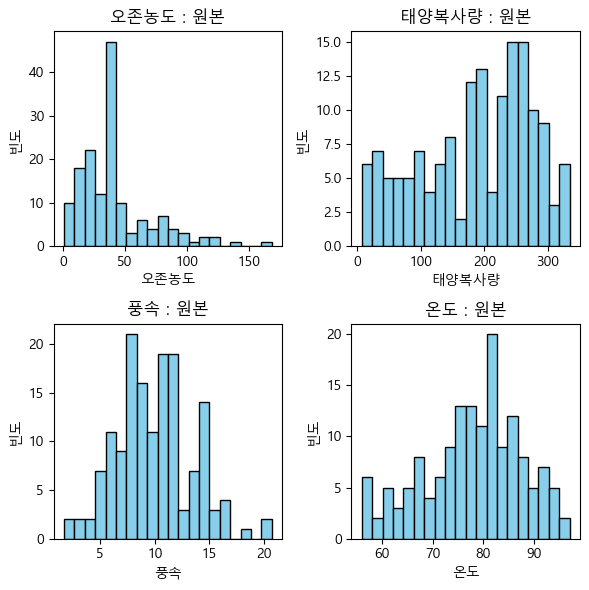

In [55]:
fig, axs = plt.subplots(2, 2,figsize = (6, 6))
for i, feature in enumerate(features):
    # i는 features의 인덱스 숫자 (0~3)
    # feature는 문자열 리스트 (오존농도~온도)
    
    ax = axs[i//2, i%2]
    # axs[0//2, 0%2] ~ axs[3//2, 3%2]
    # axs[0, 0], ~ axs[1, 1]
    ax.hist(df[feature], bins = 20, color='skyblue', edgecolor = 'black')
    ax.set_title(f'{feature} : 원본')
    ax.set_xlabel(feature)
    ax.set_ylabel('빈도')
plt.tight_layout()
plt.show()

In [57]:
# pip install scikit-learn

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
import_scaler = MinMaxScaler()

In [60]:
df_normalized = df.copy()

In [61]:
df_normalized.head(3)

,오존농도,태양복사량,풍속,온도,월,일
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3


In [64]:
features

['오존농도', '태양복사량', '풍속', '온도']

In [67]:
# df_normalized[features]
df_normalized[features] = import_scaler.fit_transform(df[features])
df_normalized.head()

,오존농도,태양복사량,풍속,온도,월,일
1,0.239521,0.559633,0.300000,0.268293,5,1
2,0.209581,0.339450,0.331579,0.390244,5,2
3,0.065868,0.434251,0.573684,0.439024,5,3
4,0.101796,0.935780,0.515789,0.146341,5,4
5,0.246283,0.547191,0.663158,0.000000,5,5


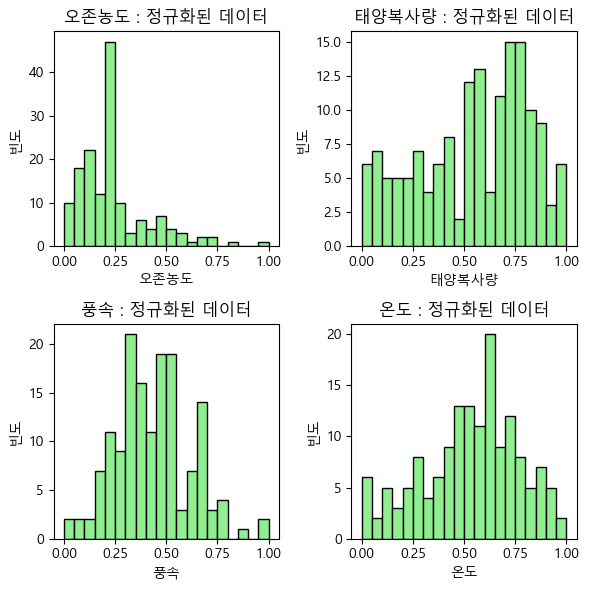

In [68]:
fig, axs = plt.subplots(2, 2,figsize = (6, 6))
for i, feature in enumerate(features):
    ax = axs[i//2, i%2]
    ax.hist(df_normalized[feature], bins = 20, color='lightgreen', edgecolor = 'black')
    ax.set_title(f'{feature} : 정규화된 데이터')
    ax.set_xlabel(feature)
    ax.set_ylabel('빈도')
plt.tight_layout()
plt.show()

## 4. 표준화 (Standardization)
- 데이터를 평균 0, 표준편차 1로 조정하는 방법 (정규분포화)
### 4-1. Standard Scaling
- 데이터가 고르게 분포되지 않았을 때 표준화

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler_std = StandardScaler()
df_standardized = df.copy()
df_standardized[features] = scaler_std.fit_transform(df[features])

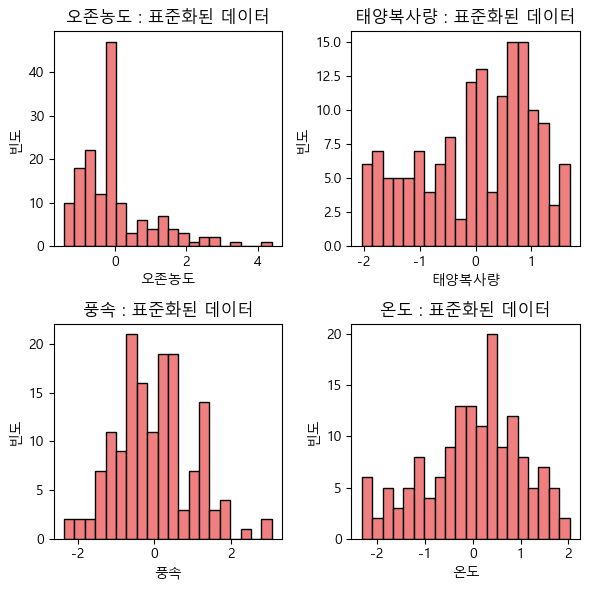

In [72]:
fig, axs = plt.subplots(2, 2,figsize = (6, 6))
for i, feature in enumerate(features):
    ax = axs[i//2, i%2]
    ax.hist(df_standardized[feature], bins = 20, color='lightcoral', edgecolor = 'black')
    ax.set_title(f'{feature} : 표준화된 데이터')
    ax.set_xlabel(feature)
    ax.set_ylabel('빈도')
plt.tight_layout()
plt.show()

## 5. 데이터 인코딩 (Encoding)
- 범주형 데이터를 수치형 데이터로 변환하여 머신러닝 알고리즘에 사용할 수 있도록 함

In [73]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [74]:
person_data = {
    '이름' : ['김철수', '이영희', '박민수', '최지혜', '정현우'],
    '성별' : ['남', '여', '남', '여', '남']
}

person_df = pd.DataFrame(person_data)
person_df

,이름,성별
0,김철수,남
1,이영희,여
2,박민수,남
3,최지혜,여
4,정현우,남


In [75]:
encoder = LabelEncoder()
person_df['성별_인코딩'] = encoder.fit_transform(person_df['성별'])
person_df

,이름,성별,성별_인코딩
0,김철수,남,0
1,이영희,여,1
2,박민수,남,0
3,최지혜,여,1
4,정현우,남,0


### 5-1. Label Encoding
- 수동 인코딩, 성별을 1(남), 0(여)로 변환

In [82]:
person_data = {
    '이름' : ['김철수', '이영희', '박민수', '최지혜', '정현우'],
    '성별' : ['남', '여', '남', '여', '남']
}

person_df = pd.DataFrame(person_data)
person_df

,이름,성별
0,김철수,남
1,이영희,여
2,박민수,남
3,최지혜,여
4,정현우,남


In [85]:
person_df['성별_라벨링'] = person_df['성별'].apply(lambda x : 1 if x == '남' else 0)

In [86]:
person_df

,이름,성별,성별_라벨링
0,김철수,남,1
1,이영희,여,0
2,박민수,남,1
3,최지혜,여,0
4,정현우,남,1


### 5-2. One-Hot Encoding
- 성별을 남/여로 나누어 각각의 열로 변환
- One-Hot Encoding은 범주형 데이터를 이진 변수로 변환하여, 각 범주를 독립적인 열로 만듦

In [89]:
person_data = {
    '이름' : ['김철수', '이영희', '박민수', '최지혜', '정현우'],
    '성별' : ['남', '여', '남', '여', '남']
}

person_df = pd.DataFrame(person_data)
person_df

,이름,성별
0,김철수,남
1,이영희,여
2,박민수,남
3,최지혜,여
4,정현우,남


In [90]:
df_onehot = pd.get_dummies(person_df, columns=['성별'])
df_onehot

,이름,성별_남,성별_여
0,김철수,True,False
1,이영희,False,True
2,박민수,True,False
3,최지혜,False,True
4,정현우,True,False


In [91]:
person_data = {
    '이름' : ['김철수', '이영희', '박민수', '최지혜', '정현우'],
    '성별' : ['남', '여', '남', '여', '남'],
    '사는 곳' : ['부산', '부산', '서울', '부산', '서울'],
    '취미' : ['게임', '등산', '등산', '게임', '등산']
}

person_df = pd.DataFrame(person_data)
person_df

,이름,성별,사는 곳,취미
0,김철수,남,부산,게임
1,이영희,여,부산,등산
2,박민수,남,서울,등산
3,최지혜,여,부산,게임
4,정현우,남,서울,등산


In [ ]:
df_onehot = pd.get_dummies(person_df, columns=['성별', '사는 곳', '취미'])

,이름,성별_남,성별_여,사는 곳_부산,사는 곳_서울,취미_게임,취미_등산
0,김철수,True,False,True,False,True,False
1,이영희,False,True,True,False,False,True
2,박민수,True,False,False,True,False,True
3,최지혜,False,True,True,False,True,False
4,정현우,True,False,False,True,False,True


## 6. 통계적 검정
- 데이터를 바탕으로 하여 특정 가설이 `참`인지 `거짓`인지를 판단하는 과정
- 일반적으로 두 집단 간의 차이를 비교하거나, 변수 간의 관계를 분석할 때 사용  

|용어|설명|
|--|--|
|모집단|전체 데이터를 의미하며, 분석 대상이 되는 큰 그룹.|
|표본|모집단에서 선택한 일부 데이터를 의미함.|
|귀무가설(H0)|차이가 없거나 관계가 없다고 가정하는 기본 가설.|
|대립가설(H1)|차이가 있거나 관계가 있다는 가정.|
|유의수준(α)|보통 0.05로 설정하며, 결과가 우연일 가능성을 의미함.|
|p-value|귀무가설이 맞다는 전제하에 데이터가 관측될 확률.|


## 7. T-TEST
- 두 그룹 간의 평균 차이를 비교하는 통계 방법
- p-value가 0.05보다 작으면 두 그룹 간의 차이가 유의미하다고 판단

In [93]:
import numpy as np
from scipy.stats import ttest_ind, f_oneway, chi2_contingency

In [ ]:
np.random.normal(80, 10, 10).tolist()
# 평균, 표준편차, 데이터갯수

[85.95555776456287,
 79.16277653676741,
 83.26110354361897,
 89.6036477901583,
 95.70760698947373,
 67.04478302115125,
 88.50213306224768,
 77.96995123145727,
 75.81400854673439,
 103.40145241749009]

In [95]:
data_ttest = pd.DataFrame({
    '성별' : ['남']*10 + ['여']*10,
    '점수' : np.random.normal(75, 10, 10).tolist() + np.random.normal(80, 10, 10).tolist()
})

In [96]:
data_ttest.head()

,성별,점수
0,남,70.648543
1,남,68.188409
2,남,80.780939
3,남,70.106986
4,남,72.662367


In [97]:
man = data_ttest[data_ttest['성별'] == '남']['점수']
man

0    70.648543
1    68.188409
2    80.780939
3    70.106986
4    72.662367
5    61.381014
6    59.356969
7    89.239073
8    71.926309
9    72.121367
Name: 점수, dtype: float64

In [98]:
girl = data_ttest[data_ttest['성별']=='여']['점수']
girl

10    80.353147
11    74.239293
12    99.466865
13    86.429479
14    88.925322
15    70.728875
16    68.531159
17    86.462780
18    86.675265
19    86.805016
Name: 점수, dtype: float64

In [100]:
t_stat, p_val = ttest_ind(man, girl)

In [ ]:
print(f'p-value :  {p_val}')
# 유의수준 0.05 라는 값을 주로 설정합니다
# 우리가 관측한 p-value의 값이 0.05보다 작은 경우, 두 그룹의 평균에 유의미한 차이가 있다고 판단
# 귀무가설 : 두 집단 사이에 유의미한 차이가 없다
# 두 집단에 유의미한 차이가 있다 : 귀무가설을 기각

p-value :  0.012388547484703092


In [103]:
# ANOVA : 세 그룹 간 평균을 비교
data_anova = pd.DataFrame({
    '그룹' : ['A']*10 + ['B']*10 + ['C']*10,
    '점수' : np.random.normal(70, 10, 10).tolist() + np.random.normal(75, 10, 10).tolist() + np.random.normal(80, 10, 10).tolist()
})

In [104]:
data_anova.head()

,그룹,점수
0,A,88.872853
1,A,70.291448
2,A,73.191815
3,A,55.219354
4,A,67.640756


In [105]:
group_a = data_anova[data_anova['그룹'] == 'A']['점수']
group_b = data_anova[data_anova['그룹'] == 'B']['점수']
group_c = data_anova[data_anova['그룹'] == 'C']['점수']

In [107]:
f_stat, p_val = f_oneway(group_a, group_b, group_c)
print(f'p-value : {p_val}')
# 유의수준인 0.05보다 큰 p-value, 세 그룹 사이에 유의미한 차이가 없다 라고 볼 수 있음
# f_stat가 크면, 집단 간 차이가 크다. 작으면 집단 간 차이가 작다

p-value : 0.05643827924076389


In [108]:
# 카이제곱검정, 범주형 변수 간의 독립성을 검정
# 고객이 만족도 조사를 했는데, 그 조사를 한 지역이 서울과 부산으로 두 가지 입니다
data_chi2 = pd.DataFrame({
    '지역' : ['서울']*50 + ['부산']*50,
    '만족도' : ['만족']*30 + ['불만족']*20 + ['만족']*25 + ['불만족']*25
})
data_chi2.head()

,지역,만족도
0,서울,만족
1,서울,만족
2,서울,만족
3,서울,만족
4,서울,만족


In [109]:
cross_table = pd.crosstab(data_chi2['지역'], data_chi2['만족도'])
cross_table

만족도,만족,불만족
지역,,
부산,25,25
서울,30,20


In [111]:
chi2, p_val_chi2, _, __ = chi2_contingency(cross_table)

In [ ]:
print(f'chi2-statisctic : {chi2}, p-value : {p_val_chi2}')
# p-value가 유의수준인 0.05보다 크기 떄문에 두 변수 간의 관계가 통계적으로 유의미하지않다
# 결론 : 두 변수는 독립적이다

chi2-statisctic : 0.6464646464646464, p-value : 0.4213795037428697


In [114]:
iris = data('iris')

In [ ]:
iris.head()
# 꽃받침 길이, 꽃받침너비, 꽃잎길이, 꽃잎너비, 꽃 종류

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [116]:
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)


## 🌼마무리 문제

아래 문제들을 풀어보세요!

Q1. 가상의 헬스앱에서 친구들이 공유한 운동 기록 데이터를 분석합니다. 일부 운동기록에서 누락된 중요한 정보가 있습니다. 이 때 데이터를 정리하기 위해 결측치를 찾아서 처리해보세요
* fitness.csv

Q2. 걸음 수와 소모 칼로리 컬럼의 값을 Min-Max Scaling하여 정규화하세요

Q3. 걸음 수나 소모 칼로리가 너무 높은 값을 기록한 데이터를 확인해보세요. 박스플롯을 그려보고 이상치를 탐색하여 처리해보세요

Q4. 데이터를 분석하기 전에 운동 시간과 소모 칼로리를 표준화해보세요

Q5. 결측치와 이상치를 처리하고, 걸음 수와 소모 칼로리에 대해 정규화 및 표준화를 수행한 후. 성별을 인코딩하여 범주형 데이터를 처리해보세요